# Muskingum Routing

-----------------------------------------------
DTR

# Import Packages

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
import scienceplots

In [5]:
import os

# Directory Management

In [6]:
os.getcwd()

'C:\\Users\\drwas\\Documents\\UZ_2023_Hydrology_BSc'

# File

In [7]:
dir_data = './DATA/'

In [8]:
filename = "Inflow_Hydrograph.ods"

In [9]:
fname = os.path.join(dir_data,filename)
fname

'./DATA/Inflow_Hydrograph.ods'

# Read Data

Since we want to read an .ods file, Pandas needs us to specify the engine we are going to use. We will use the "odf" engine. You might need to install it.

In [10]:
ds_inflow = pd.read_excel( fname, sheet_name='data', engine="odf")

In [11]:
ds_inflow.head()

,Time,Inflow
0,0,100.0
1,2,120.0
2,4,150.0
3,6,200.0
4,8,223.4


In [12]:
len(ds_inflow)

19

# Muskingum Routing

## Coefficients

In [13]:
C1 = 0.24
C2 = 0.39
C3 = 0.37

if (C1+C2+C3) != 1.0:
    print("Your coefficients are not adding up to 1")

## Output Array

In [14]:
# allocate output array

Q = np.zeros(len(ds_inflow) )+-99 # define the empty array
Q

array([-99., -99., -99., -99., -99., -99., -99., -99., -99., -99., -99.,
       -99., -99., -99., -99., -99., -99., -99., -99.])

# Initial Value

In [15]:
### Assign initial value
Q[0] = 100 # initial value of Q

In [16]:
Q

array([100., -99., -99., -99., -99., -99., -99., -99., -99., -99., -99.,
       -99., -99., -99., -99., -99., -99., -99., -99.])

## Routing 

In [17]:
# df to array for inflow
Inflow = np.array( ds_inflow.Inflow  ) 
#Inflow

In [18]:
## Route the flows using a for loop

for i in range(1, len(ds_inflow) ):
    Q[i] = C1*Inflow[i] + C2*Inflow[i-1] + C3*Q[i-1]
    

print('===========================')
print('...completed processing')

...completed processing


In [19]:
Q

array([100.        , 104.8       , 121.576     , 151.48312   ,
       187.6647544 , 214.52195913, 235.95812488, 248.4165062 ,
       243.7861073 , 228.5158597 , 207.70086809, 183.04932119,
       155.02824884, 130.56045207, 115.20736727, 105.62672589,
       102.08188858, 100.77029877, 100.28501055])

# Plot

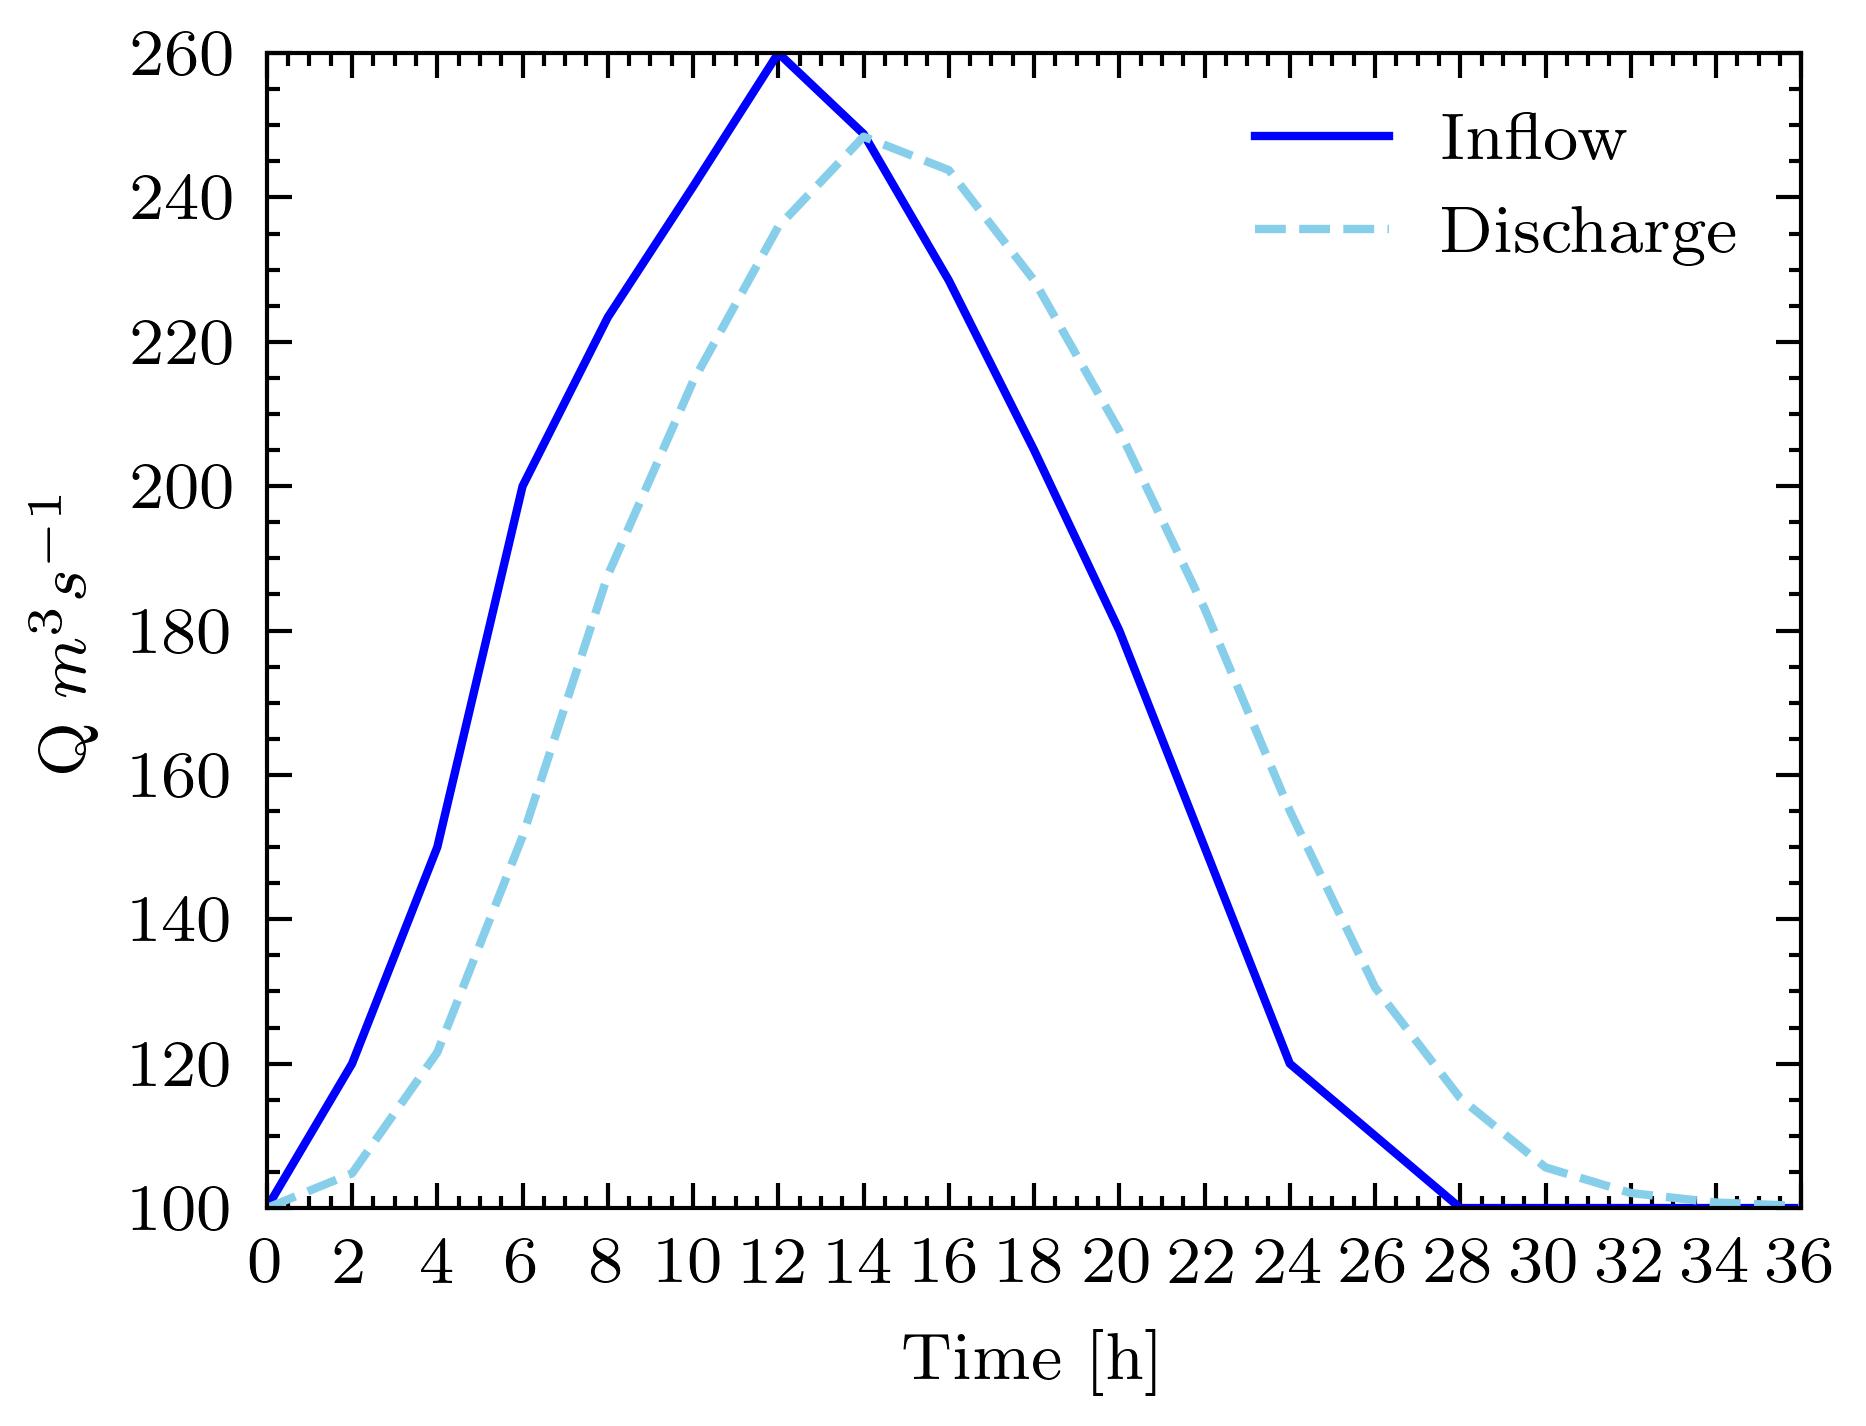

In [20]:
#trigger scienceplots - for that extra touch
with plt.style.context(['science', 'ieee']):
    
    fig, ax = plt.subplots()
    ## plot inflow hydrograph
    ax.plot(ds_inflow.Time, ds_inflow.Inflow, color='blue', label='Inflow')
    #plot discharge
    ax.plot(ds_inflow.Time, Q, color='skyblue', label='Discharge')
    ##
    ax.xaxis.set_ticks(np.array(ds_inflow.Time))
    ax.set_xticklabels( np.array(ds_inflow.Time) )
    ax.set_ylabel('Q $m^3 s^{-1}$')
    ax.set_xlabel('Time [h]')
    ax.legend()
    ax.autoscale(tight=True)
    fig.savefig('Muskingum_routing.png', dpi=300)
    plt.show()